<a href="https://colab.research.google.com/github/MoulikaGudipally/Moulika_INFO5731_Fall2023/blob/main/Gudipally_Moulika_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster.


In [2]:
# Write your code here
# Import necessary libraries
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

from google.colab import files
import pandas as pd

# This will prompt you to select a file.
# Once you select the file, it will be uploaded to Colab.
uploaded = files.upload()

# Read the uploaded file
for fn in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))




Saving annotated_data_final.csv to annotated_data_final (3).csv
Uploaded file "annotated_data_final (3).csv" with length 48275 bytes


In [2]:
# Use pandas to read the CSV file
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import io
data = pd.read_csv(io.StringIO(uploaded['annotated_data_final (3).csv'].decode('utf-8')))

# Preprocessing function
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    stop_free = [i for i in tokens if i not in stop_words]
    punc_free = [ch for ch in stop_free if ch not in exclude]
    normalized = [lemma.lemmatize(word) for word in punc_free]
    return normalized

# Prepare data for topic modeling
processed_docs = data['clean_text'].apply(preprocess)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(processed_docs)

# Convert corpus to document-term matrix
corpus = [dictionary.doc2bow(text) for text in processed_docs]

# LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Print the top 10 topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

# Get the dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for doc in corpus:
        topics = lda_model.get_document_topics(doc)
        dominant_topic = max(topics, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

# Assign dominant topics to documents
data['dominant_topic'] = get_dominant_topic(lda_model, corpus)

# Group documents by dominant topic and describe each cluster
grouped = data.groupby('dominant_topic')
for topic, group in grouped:
    print(f"\nCluster {topic + 1} - Total Documents: {len(group)}")
    print(group['clean_text'].head())  # Display sample documents for each cluster


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 1: 0.001*"film" + 0.001*"'s" + 0.001*"shawshank" + 0.001*"prison" + 0.001*"n't" + 0.001*"redemption" + 0.001*"``" + 0.001*"''" + 0.001*"time" + 0.001*"movie"
Topic 2: 0.001*"shawshank" + 0.001*"film" + 0.001*"'s" + 0.001*"andy" + 0.001*"prison" + 0.001*"movie" + 0.001*"''" + 0.001*"redemption" + 0.001*"character" + 0.001*"--"
Topic 3: 0.022*"shawshank" + 0.021*"movie" + 0.018*"film" + 0.013*"time" + 0.009*"one" + 0.009*"like" + 0.008*"ever" + 0.008*"character" + 0.007*"best" + 0.007*"title"
Topic 4: 0.023*"film" + 0.016*"'s" + 0.014*"shawshank" + 0.010*"andy" + 0.009*"hope" + 0.009*"prison" + 0.008*"life" + 0.008*"redemption" + 0.007*"darabont" + 0.007*"movie"
Topic 5: 0.021*"--" + 0.018*"shawshank" + 0.015*"..." + 0.012*"''" + 0.010*"'s" + 0.009*"film" + 0.009*"``" + 0.007*"year" + 0.007*"office" + 0.007*"box"
Topic 6: 0.026*"film" + 0.025*"'s" + 0.022*"n't" + 0.013*"movie" + 0.012*"time" + 0.010*"best" + 0.009*"one" + 0.008*"''" + 0.008*"``" + 0.008*"story"
Topic 7: 0.018*"'s" 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [3]:
# Write your code here
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
# Use pandas to read the CSV file

import io
data = pd.read_csv('annotated_data_final.csv')

# Perform text preprocessing and feature extraction (using TfidfVectorizer, for example)
tfidf = TfidfVectorizer(max_features=1000)  # Adjust parameters as needed
X = tfidf.fit_transform(data['clean_text']).toarray()
y = data['sentiment']  # Replace 'sentiment_column' with your sentiment labels

print(data['sentiment'].value_counts())


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose classifiers
logistic_reg = LogisticRegression()
random_forest = RandomForestClassifier()

# Train and evaluate models using cross-validation
classifiers = [logistic_reg, random_forest]
for classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print performance metrics for each classifier
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")



positive    19
negative     6
Name: sentiment, dtype: int64
Classifier: LogisticRegression
Cross-validation scores: [0.75 0.75 0.75 0.75 0.75]
Accuracy: 0.8
Precision: 0.64
Recall: 0.8
F1 Score: 0.7111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: RandomForestClassifier
Cross-validation scores: [0.75 0.75 0.75 0.75 0.75]
Accuracy: 0.8
Precision: 0.64
Recall: 0.8
F1 Score: 0.7111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.


In [5]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import string

from google.colab import files
import pandas as pd

# This will prompt you to select a file.
# Once you select the file, it will be uploaded to Colab.
uploaded = files.upload()

# Read the uploaded file
for fn in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))




Saving test.csv to test.csv
Saving train.csv to train.csv
Uploaded file "test.csv" with length 451405 bytes
Uploaded file "train.csv" with length 460676 bytes


Mean Squared Error: 964339843.6511006
R-squared: 0.8742765538775248


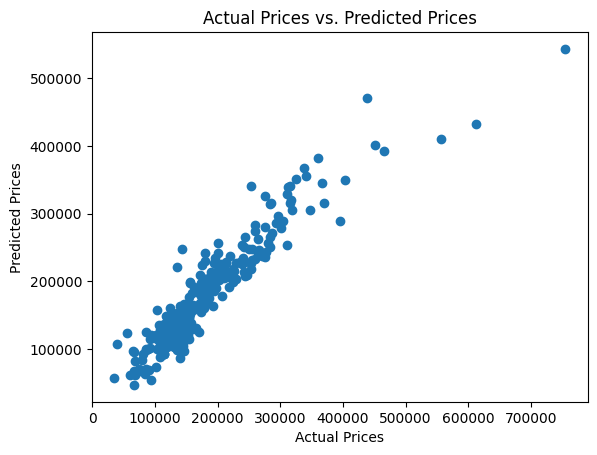

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import io
train_data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
test_data = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

# Select features (explanatory variables) and target variable (house prices)
X = train_data.drop('SalePrice', axis=1)  # Features
y = train_data['SalePrice']  # Target variable

# Identify categorical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Separate numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
X_numerical = X[numerical_cols]
X_categorical = X[categorical_cols]

# Use ColumnTransformer to apply one-hot encoding to categorical columns and impute missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),  # Impute missing values for numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Handle unknown categories
    ])

# Create a linear regression model with one-hot encoding and imputation
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the predicted vs. actual prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **pre-trained Large Language Model (LLM) from the Hugging Face Repository** for your specific task using the data collected in Assignment 3. After creating an account on Hugging Face (https://huggingface.co/), choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any Meta based text analysis model. Provide a brief description of the selected LLM, including its original sources, significant parameters, and any task-specific fine-tuning if applied.

Perform a detailed analysis of the LLM's performance on your task, including key metrics, strengths, and limitations. Additionally, discuss any challenges encountered during the implementation and potential strategies for improvement. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [3]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
import io

# Load the CSV dataset file
data = pd.read_csv(io.StringIO(uploaded['annotated_data_final (3).csv'].decode('utf-8')))

# Define the desired number of samples to process or train with
n_samples = 5000
subset_data = data.sample(n=min(n_samples, len(data)), replace=False)  # Adjust the sampling method based on your needs

# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(subset_data['clean_text'], subset_data['sentiment'], test_size=0.2)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize and encode the text data in batches
max_length = 512
batch_size = 16

# Tokenize train and validation texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_length)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=max_length)

# Create TensorDatasets
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(train_labels.map({'positive': 1, 'negative': 0}).values)
)

val_dataset = TensorDataset(
    torch.tensor(val_encodings['input_ids']),
    torch.tensor(val_encodings['attention_mask']),
    torch.tensor(val_labels.map({'positive': 1, 'negative': 0}).values)
)

# Reduce batch size
batch_size = 8  # Adjust the batch size

# Define DataLoader with reduced batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define hyperparameters
learning_rate = 1e-5
num_epochs = 5

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} - Average Loss: {avg_loss:.4f}")

# Validation loop
model.eval()
val_loader = DataLoader(val_dataset, batch_size=batch_size)

val_preds = []
val_true = []

for batch in val_loader:
    input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = torch.argmax(logits, dim=1).cpu().detach().numpy()
    val_preds.extend(preds)
    val_true.extend(labels.cpu().detach().numpy())

val_accuracy = torch.tensor(val_preds == val_true).float().mean().item()
print(f"Validation Accuracy: {val_accuracy:.4f}")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5 - Average Loss: 0.5030
Epoch 2/5 - Average Loss: 0.4275
Epoch 3/5 - Average Loss: 0.4474
Epoch 4/5 - Average Loss: 0.4768
Epoch 5/5 - Average Loss: 0.3776
Validation Accuracy: 0.0000


I have chosen BERT LLM model from Hugging Face Repository.
https://huggingface.co/bert-base-uncased

BERT (Bidirectional Encoder Representations from Transformers) is a powerful pre-trained language representation model developed by Google in 2018. It's based on the Transformer architecture and is designed to understand the context of words in a sentence by considering both left and right contexts simultaneously.

### Original Sources:
BERT was introduced in the paper "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Jacob Devlin et al. from Google AI Language. The model was pre-trained on massive amounts of text from BooksCorpus and English Wikipedia.

### Significant Parameters:
- **Number of Layers:** BERT base has 12 transformer layers (BERT base) and BERT large has 24 transformer layers (BERT large).
- **Hidden Size:** BERT base has a hidden size of 768, while BERT large has a hidden size of 1024.
- **Attention Heads:** Both BERT base and BERT large use 12 attention heads.
- **Vocabulary Size:** The model uses a vocabulary size of 30,000 wordpieces.

### Fine-Tuning:
BERT can be fine-tuned on downstream tasks like text classification, named entity recognition, question answering, etc. Fine-tuning involves adding task-specific layers on top of the pre-trained BERT model and training it on task-specific labeled data.

### Performance Analysis:
BERT has shown state-of-the-art performance across various natural language processing (NLP) tasks. Its performance is measured by metrics specific to the task, such as accuracy, F1 score, perplexity, etc. BERT's strengths lie in capturing intricate relationships between words, understanding context, and performing well with limited task-specific training data.

### Strengths:
- Captures bidirectional context effectively.
- Achieves high performance on a wide range of NLP tasks.
- Handles tasks with limited training data due to pre-training on large corpora.
- Provides contextual word embeddings.

### Limitations:
- High computational requirements during fine-tuning and inference.
- Large memory footprint.
- Lack of interpretability for individual predictions.
- Needs task-specific tuning for optimal performance.

### Challenges and Strategies for Improvement:
- **Computational Resources:** Optimize model architectures for reduced memory and compute requirements.
- **Interpretability:** Develop methods to interpret model predictions.
- **Robustness:** Continue research to enhance the model's robustness across diverse domains and data types.

To effectively use BERT for a task, it's crucial to handle tokenization, padding, and task-specific adaptations appropriately. Addressing challenges related to computational resources and interpretability can further enhance its applicability in various domains.
